# Introduction to Hidden Markov Models

-----

In this notebook, we introduce hidden Markov models.

-----


## Table of Contents


[Hidden Markov Model](#Hidden-Markov-Model)


[](#)


[](#)


-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
1

1

In [2]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

rng = np.random.RandomState(23)

-----

[[Back to TOC]](#Table-of-Contents)

## Hidden Markov Model

In this notebook uses a hidden Markov model to simulate observations of a series of auditors. We assume there are two auditors that write down numbers (or states), one is always fair and the other is fair part of the time. We transition between the two auditors as a Markov process with state transition probabilities, and we have initial odds of choosing either auditor as our starting point. The following Code cells generate this simulations, and generate visualizations showing which auditor is being used at any time (normally this would be hidden), as well as the numbers written down by the auditors (which is normally all we would observe).

https://github.com/lcdm-uiuc/accy571-fa17/blob/master/Module9/notebooks/intro2mc.ipynb

-----

In [3]:
n_states = 5
size = 1000

odds = np.array([7./10, 3./10])
stp_array = np.array([[0.95, 0.05], [0.1, 0.9]])
obs_states = np.array([[1./n_states for i in range(n_states)], 
                       [0.1, 0.1, 0.1, 0.1, 0.6]])

In [4]:
obs_states

array([[ 0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0.1,  0.1,  0.1,  0.1,  0.6]])

In [4]:
hidden_state = np.zeros(size, dtype=np.int8)

hidden_state[0] = rng.choice([0, 1], size = 1, p=odds)[0]

for idx in range(1, size):
    hidden_state[idx] = rng.choice(range(stp_array.shape[1]), size = 1,
                                         p=stp_array[hidden_state[idx - 1]])[0]

In [6]:
good = np.where(hidden_state==0)
bad = np.where(hidden_state==1)
print(f'Number of Good states = {good[0].shape[0]}')
print(f'Number of Bad states = {bad[0].shape[0]}')

Number of Good states = 686
Number of Bad states = 314


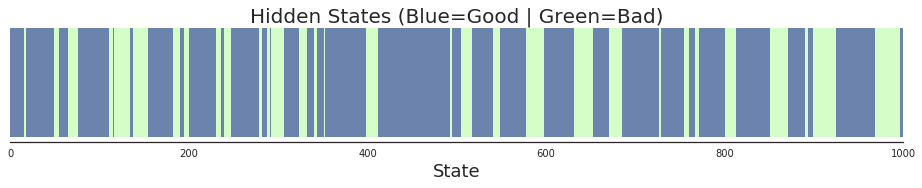

In [7]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots(figsize=(16, 2))

patches = [Rectangle((x, 0), 1, 1) for x in good[0]]
pc = PatchCollection(patches, facecolor=sns.xkcd_rgb['denim blue'], alpha=0.75)
ax.add_collection(pc)   

patches = [Rectangle((x, 0), 1, 1) for x in bad[0]]
pc = PatchCollection(patches, facecolor=sns.xkcd_rgb['pale green'], alpha=0.75)
ax.add_collection(pc)

ax.set(title='Hidden States (Blue=Good | Green=Bad)',
      xlabel='State', xlim = (0, size))

sns.despine(offset=5)
ax.spines['left'].set_visible(False)
ax.set_yticks([]) ;

In [8]:
obs_state = np.zeros(size, dtype=np.int8)

for idx in range(size):
    obs_state[idx] = rng.choice(range(obs_states.shape[1]), size = 1, 
                                      p=obs_states[hidden_state[idx]])[0]

In [9]:
obs_state

array([4, 4, 0, 1, 4, 3, 4, 3, 2, 2, 3, 1, 4, 1, 1, 3, 2, 1, 3, 1, 1, 1, 1,
       4, 4, 2, 2, 4, 1, 2, 4, 2, 1, 2, 0, 2, 4, 2, 4, 0, 1, 2, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 0, 4, 4, 4, 4, 2, 1, 3, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       0, 4, 0, 4, 4, 2, 4, 0, 0, 1, 2, 1, 4, 2, 4, 0, 1, 3, 2, 4, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 4, 0, 3, 1, 3, 3, 2, 2, 1, 0, 1, 2, 2, 4, 0, 4, 2,
       0, 2, 4, 1, 3, 4, 4, 1, 4, 4, 4, 1, 4, 0, 4, 4, 4, 1, 4, 3, 1, 4, 2,
       3, 2, 4, 2, 4, 3, 4, 3, 1, 3, 4, 4, 4, 1, 4, 0, 0, 3, 2, 3, 1, 4, 2,
       1, 4, 4, 0, 4, 0, 2, 3, 1, 0, 0, 1, 3, 0, 2, 1, 3, 2, 0, 0, 4, 4, 4,
       3, 4, 4, 2, 4, 4, 4, 0, 3, 0, 4, 4, 2, 4, 4, 0, 0, 1, 4, 1, 4, 0, 4,
       2, 2, 4, 1, 2, 0, 3, 0, 0, 2, 2, 1, 4, 1, 0, 1, 1, 2, 4, 4, 4, 2, 0,
       4, 4, 4, 3, 4, 3, 4, 1, 3, 2, 4, 2, 3, 2, 2, 4, 2, 1, 4, 1, 0, 4, 4,
       4, 2, 2, 0, 3, 1, 3, 0, 2, 1, 4, 0, 4, 2, 2, 3, 1, 2, 3, 2, 4, 4, 2,
       0, 1, 4, 4, 3, 4, 0, 2, 1, 1, 0, 1, 1, 2, 4, 1, 1, 4, 3, 3, 1, 4, 2,
       4, 4,

In [7]:
for idx in range(obs_states.shape[1]):
    cnt = np.where(obs_state==idx)[0].shape[0]
    print(f'Number of times {idx} occurrs = {cnt}')

Number of times 0 occurrs = 161
Number of times 1 occurrs = 170
Number of times 2 occurrs = 185
Number of times 3 occurrs = 162
Number of times 4 occurrs = 322


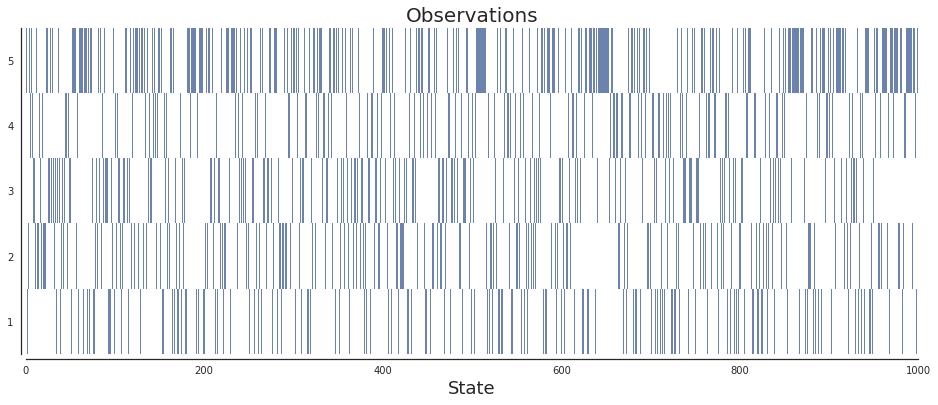

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))
for idx in range(obs_states.shape[1]):

    states = np.where(obs_state==idx)[0]
    
    patches = [Rectangle((x, idx + 0.5), 1, 1) for x in states]
    pc = PatchCollection(patches, facecolor=sns.xkcd_rgb['denim blue'], alpha=0.75)
    ax.add_collection(pc)  

ax.set(title='Observations',
      xlabel='State', xlim = (0, size), ylim = (0.5, obs_states.shape[1] + 0.5))

sns.despine(offset=5)

-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we simulated a Markov process. To estimate the underlying states, we would need to use special hidden Markov model software. Since this isn't currently installed on the course server, you can do so and then use this to model the underlying (hidden system). The easiest library to use is the [_hmmlearn_][hl] library (which used to be part of the scikit learn library). Download and install this library (enter `!pip install hmmlearn` in a code cell). Then build a hidden Markov model for our simulation. If you are successful, share what you did and learned in the class forums.

-----

[hl]: https://github.com/hmmlearn/hmmlearn


## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

12. Wikipedia article on [hidden Markov models][whmm]
21. Introduction to [hidden Markov models][qhmm] using Python
3. [Hidden Markov model][phmmi] tutorial for stock prices using Python 
4. Multipart tutorial on [hidden Markov models][hmmr] in finance, using R
5. Another multipart tutorial on [hidden Markov models][hmmrd] in finance, using R
11. Introduction to [hidden Markov models][qhmm] using R from a quantitative finance perspective
6. Presentation introducing [hidden Markov models][phmmo]
7. Tutorial on [hidden Markov models][thmm] for speech recognition

-----

[whmm]: https://en.wikipedia.org/wiki/Hidden_Markov_model

[qhmm]: https://www.quantstart.com/articles/hidden-markov-models-an-introduction

[phmmi]: http://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017

[pchmm]: https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py

[thmm]: https://codefying.com/2016/09/15/a-tutorial-on-hidden-markov-model-with-a-stock-price-example/

[hmmrd]: https://www.quantstart.com/articles/hidden-markov-models-for-regime-detection-using-r

[hmmr]: http://gekkoquant.com/2014/05/18/hidden-markov-models-model-description-part-1-of-4/

[phmmo]: http://www.robots.ox.ac.uk/~vgg/rg/slides/hmm.pdf

[thmm]: http://www-stat.wharton.upenn.edu/~steele/Courses/956/ResourceDetails/HiddenMarkovModels/HMMTutorial/rabiner89.pdf

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode